clustering con classificatore binario per ogni classe --> predict_proba

In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from modules import machine_learning_utils as mlu

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle("../../data_lake/output/train.pkl")

# 2.0 Features Engineering

In [4]:
df = mlu.features_eng(df,'clustering')

In [5]:
cols = ['card1', 'card2', 'card3', 'card5', 'M4', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38','num_transaction_per_time','addr1','P_emaildomain','R_emaildomain']

In [6]:
df = df.drop(columns=cols)

In [7]:
df = df[df['isFraud']==0]
df = df.drop(columns='isFraud')

In [8]:
df = df.drop(columns=['addr2','multi_transaction_per_time'])

In [9]:
df.sample(1)

,TransactionAmt,ProductCD,card4,card6,DeviceType,max_c,max_d,customer_id,browser_enc,device_info_v4
53279,1000.0,R,visa,credit,tablet,1.0,162.875,1711,ie,windows


In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

imp_mean = IterativeImputer(random_state=0)
imp_mean2 = SimpleImputer(strategy='constant', fill_value='missing',verbose=0,add_indicator=True)
enc = OrdinalEncoder()
scaler = MinMaxScaler()

In [12]:
for i in df:
    if i in numerical_cols:
        if i != 'customer_id':
            df[i] = imp_mean.fit_transform(X = df[i].values.reshape(-1,1))
            # df[i] = np.log(df[i] +1)
            df[i] = scaler.fit_transform(X = df[i].values.reshape(-1,1))

In [13]:
for i in df:
    if i in categorical_cols:
        df[i] = df[i].astype(str)
        df[i] = imp_mean2.fit_transform(X = df[i].values.reshape(-1,1))
        # df[i] = enc.fit_transform(X = df[i].values.reshape(-1,1))

In [14]:
df.sample(3)

,TransactionAmt,ProductCD,card4,card6,DeviceType,max_c,max_d,customer_id,browser_enc,device_info_v4
31937,0.099545,R,visa,credit,desktop,0.214832,0.040769,16018,ie,other
125517,0.009499,H,visa,debit,desktop,0.000178,0.000049,9952,chrome,ios
45835,0.032845,R,visa,debit,mobile,0.000000,0.000415,1744,safari,ios


In [15]:
df['product_enc'] = 999
df['product_enc'] = df['product_enc'].mask(df['ProductCD']=='C',0)
df['product_enc'] = df['product_enc'].mask(df['ProductCD']=='H',1)
df['product_enc'] = df['product_enc'].mask(df['ProductCD']=='S',2)
df['product_enc'] = df['product_enc'].mask(df['ProductCD']=='R',3)
df = df.drop(columns='ProductCD')

In [16]:
df['card4_enc'] = 999
df['card4_enc'] = df['card4_enc'].mask(df['card4']=='visa',0)
df['card4_enc'] = df['card4_enc'].mask(df['card4']=='mastercard',1)
df['card4_enc'] = df['card4_enc'].mask(df['card4']=='american express',2)
df['card4_enc'] = df['card4_enc'].mask(df['card4']=='discover',3)
df = df.drop(columns='card4')

In [17]:
df['card6_enc'] = 999
df['card6_enc'] = df['card6_enc'].mask(df['card6']=='debit',0)
df['card6_enc'] = df['card6_enc'].mask(df['card6']=='credit',1)
df = df.drop(columns='card6')

In [18]:
df['DeviceType_enc'] = 999
df['DeviceType_enc'] = df['DeviceType_enc'].mask(df['DeviceType']=='mobile',0)
df['DeviceType_enc'] = df['DeviceType_enc'].mask(df['DeviceType']=='desktop',1)
df['DeviceType_enc'] = df['DeviceType_enc'].mask(df['DeviceType']=='tablet',2)
df = df.drop(columns='DeviceType')

In [19]:
df['browser_enc2'] = 7
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='chrome',0)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='safari',1)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='firefox',2)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='ie',3)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='android',4)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='edge',5)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='opera',6)
df = df.drop(columns='browser_enc')

In [20]:
df['device_info_v4_enc'] = 17
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='ios',0)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='windows',1)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='samsung',2)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='hisense',3)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='moto',4)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='pixel',5)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='lg',6)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='blade',7)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='huawei',8)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='oneplus',9)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='alcatel',10)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='redmi',11)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='lenovo',12)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='asus',13)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='linux',14)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='android',15)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='zte',16)
df = df.drop(columns='device_info_v4')

In [21]:
df = df.set_index('customer_id')

In [22]:
df.sample(3)

,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc
customer_id,,,,,,,,,
15020,0.066195,0.000000,0.000000,3,0,1,1,0,1
30611,0.024400,0.001601,0.000439,0,1,1,1,0,17
1709,0.018194,0.000000,0.000000,0,1,0,0,0,2


# 3.0 Clustering --> Personas generation

In [23]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

import gower
import heapq

In [24]:
# sil=[]
# for num_clusters in list(range(2,30)):
#     kproto = KPrototypes(n_clusters=num_clusters, verbose=0,random_state = 301,n_init=5)
#     cluster_labels = kproto.fit_predict(df.values, categorical=[3,4,5,6,7,8])
#     df['cluster_labels'] = cluster_labels
#     dist = gower.gower_matrix(df.drop(columns=['cluster_labels']),cat_features = [False, False ,False, True, True,True,True,True,True])
#     sil.append(silhouette_score(dist,labels=cluster_labels, metric='precomputed'))
#     print('For cluster number: ',num_clusters,' the score is: ', sil[-1])

In [25]:
# df = df.drop(columns='cluster_labels')

In [26]:
kproto = KPrototypes(n_clusters=4, verbose=0,random_state = 301)
cluster_labels = kproto.fit_predict(df.values, categorical=[3,4,5,6,7,8])

In [27]:
centroid = []
for j,i in enumerate(kproto.cluster_centroids_):
    centroid.append(pd.DataFrame(i,index=['TransactionAmt','max_c', 'max_d','product_enc', 'card4_enc', 'card6_enc',
       'DeviceType_enc', 'browser_enc2', 'device_info_v4_enc'],columns=[j]))
centroid = pd.concat(centroid,axis=1)

In [28]:
centroid.style.background_gradient(cmap='brg',axis=1)

,0,1,2,3
TransactionAmt,0.060090,0.080473,0.027653,0.066001
max_c,0.006742,0.005659,0.012320,0.000806
max_d,0.048834,0.325682,0.059076,0.015510
product_enc,0.000000,3.000000,0.000000,1.000000
card4_enc,0.000000,0.000000,0.000000,0.000000
card6_enc,1.000000,0.000000,0.000000,1.000000
DeviceType_enc,1.000000,1.000000,0.000000,0.000000
browser_enc2,0.000000,0.000000,0.000000,1.000000
device_info_v4_enc,1.000000,1.000000,17.000000,0.000000


In [29]:
df['cluster_labels'] = cluster_labels

In [30]:
df.head(1)

,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,cluster_labels
customer_id,,,,,,,,,,
116,0.018563,0.0,0.0,0,0,0,0,0,17,2


In [31]:
df['cluster_labels'].value_counts()

0    2969
2    2109
3    1918
1    1031
Name: cluster_labels, dtype: int64

# 2.0 Machine Learning on Personas
## 2.1 model cluster 0 

In [32]:
df_class = df.copy()
df_class['y'] = 0
df_class['y'] = df_class['y'].mask(df_class['cluster_labels']==0,1)

In [33]:
df_class['y'].value_counts()

0    5058
1    2969
Name: y, dtype: int64

In [34]:
train, val, test = mlu.partitioning(df_class,0.7,0.15,'y')

Train shape:  (5618, 11)
Train %: 
 0    0.627625
1    0.372375
Name: y, dtype: float64
Val %: 
 0    0.624585
1    0.375415
Name: y, dtype: float64
Test %: 
 0    0.647303
1    0.352697
Name: y, dtype: float64


In [35]:
final_train = mlu.class_imbalance(train,'y')

0    2092
1    2092
Name: y, dtype: int64
Train dataset shape:  (4184, 11)


In [36]:
for i in final_train:
    if final_train[i].dtypes == 'object':
        final_train[i] = final_train[i].astype(str)

In [37]:
X_train = final_train.drop(columns='y')
y_train = final_train['y'].astype(float)

In [38]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [39]:
parameters = {'model__max_depth':[2,3],'model__n_estimators':[50,100],'model__learning_rate':[0.05,0.1],'model__min_samples_leaf':[2,3]}

In [40]:
model = mlu.model_training(X_train,y_train,numerical_cols,categorical_cols,parameters,'no')

GridSearchCV results...
Mean Train Scores: 
[0.95777565 0.96191842 0.95777565 0.96191842 0.97848948 0.97594009
 0.97848948 0.97466539 0.96128107 0.9652645  0.96175908 0.96622052
 0.97530274 0.99267049 0.97609943 0.99251115]

Mean CV Scores: 
[0.95650096 0.96032505 0.95650096 0.96032505 0.9751434  0.97131931
 0.9751434  0.96940727 0.95936902 0.96175908 0.95984704 0.96175908
 0.96988528 0.9875717  0.97179732 0.98565966]

Best Parameters: 
{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__n_estimators': 100}



## 2.2 Evaluation model

In [41]:
for i in val:
    if val[i].dtypes == 'object':
        val[i] = val[i].astype(str)

In [42]:
X_val = val.drop(columns='y')
y_val = val['y'].astype(float)

In [43]:
m = mlu.model_calibration(model,X_val,y_val)

Test results...
Model Test Recall: 0.9756637168141593
--------------------------------------------------
Model Test Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       752
         1.0       0.97      0.98      0.97       452

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204

DeviceType_enc: 0.4609854138364308
device_info_v4_enc: 0.1994478296475283
max_d: 0.19716502997920535
card6_enc: 0.06578037016191723
browser_enc2: 0.04186100026582714
product_enc: 0.030979148240528994
TransactionAmt: 0.003701051953058443
card4_enc: 4.817813001085802e-05
max_c: 3.197778549275284e-05


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(add_indicator=True,
                                                                                    estimator=ExtraTreesRegressor(n_estimators=5,
                                                                                                                  random_state=1),
                                                                                    random_state=1)),
                                                                  ('scaler',
                                                                   FunctionTransformer(func=<function log_transform at 0x7fc8d9c3e550>))]),
                                                  Index(['TransactionAmt', 'max_c', 'max_d',...
      dtype='object')),
         

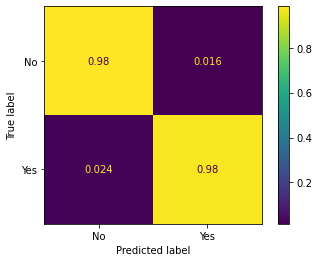

In [44]:
mlu.model_evaluation(m.base_estimator, X_val, y_val)

# 2.3 Predict probability

In [45]:
val.insert(0,'probability_score_cluster_0','')
val['probability_score_cluster_0'] = model.predict_proba(X_val)[:,1]

# 4.0 Error analysis

In [71]:
val.sample(2)

,probability_score_cluster_0,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,cluster_labels,y
customer_id,,,,,,,,,,,,
10835,0.974407,0.047869,0.0,0.0,0,0,1,1,0,17,0,1
37880,0.983641,0.007532,0.0,0.0,0,0,0,1,0,1,0,1


In [72]:
val.columns

Index(['probability_score_cluster_0', 'TransactionAmt', 'max_c', 'max_d',
       'product_enc', 'card4_enc', 'card6_enc', 'DeviceType_enc',
       'browser_enc2', 'device_info_v4_enc', 'cluster_labels', 'y'],
      dtype='object')

In [67]:
# val['kp_pred'] = kproto.predict(val[['TransactionAmt', 'max_c', 'max_d']].values,val[['product_enc', 'card4_enc', 'card6_enc', 'DeviceType_enc',
#        'browser_enc2', 'device_info_v4_enc']].values,centroid[0:3].values,centroid[0:3].values,centroid[4:9].values)

In [75]:
val[['TransactionAmt','max_c']].sample(1)

,TransactionAmt,max_c
customer_id,,
709,0.099545,0.0


In [77]:
val['kp_pred'] = kproto.predict(X=val[['TransactionAmt', 'max_c', 'max_d',
       'product_enc', 'card4_enc', 'card6_enc', 'DeviceType_enc',
       'browser_enc2', 'device_info_v4_enc']],categorical=[3,4,5,6,7,8])

In [86]:
val.sample(5)

,probability_score_cluster_0,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,cluster_labels,y,kp_pred
customer_id,,,,,,,,,,,,,
5593,0.780701,0.018960,0.000711,0.120599,0,0,0,1,0,1,0,1,0
10039,0.987735,0.099545,0.000000,0.002220,3,0,1,1,0,1,0,1,0
11103,0.922217,0.049520,0.000000,0.072364,1,0,0,1,3,1,0,1,0
16,0.000492,0.015241,0.000178,0.005270,0,0,0,0,1,17,2,0,2
13136,0.987735,0.066195,0.000000,0.015054,3,1,1,1,0,1,0,1,0


In [87]:
test['kp_pred'] = kproto.predict(X=test[['TransactionAmt', 'max_c', 'max_d',
       'product_enc', 'card4_enc', 'card6_enc', 'DeviceType_enc',
       'browser_enc2', 'device_info_v4_enc']],categorical=[3,4,5,6,7,8])

In [89]:
test.sample(3)

,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,cluster_labels,y,kp_pred
customer_id,,,,,,,,,,,,
127,0.018725,0.000534,0.000464,0,1,0,1,0,1,0,1,0
19814,0.032845,0.000000,0.000000,3,0,0,1,1,0,3,0,3
3222,0.022840,0.000000,0.054822,2,0,0,1,0,1,0,1,0


In [92]:
test[test['cluster_labels'] != test['kp_pred']]

,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,cluster_labels,y,kp_pred
customer_id,,,,,,,,,,,,


<AxesSubplot:>

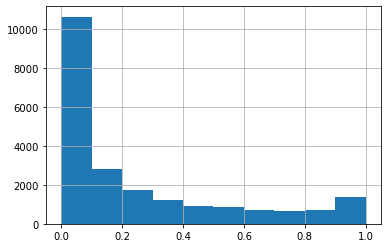

In [21]:
val['probability_score'].hist()

<AxesSubplot:>

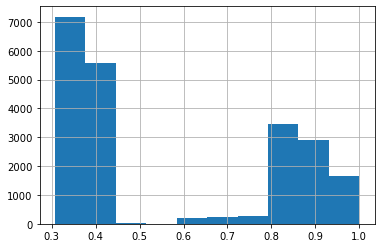

In [22]:
val['warning_score'].hist()

# 5.0 Bayesian Fusion

In [23]:
val['final_score'] = val.apply(lambda x: mlu.beta_fusion(x['probability_score'],x['warning_score'],0.6),axis=1)

In [24]:
val.sample(2)

,probability_score,isFraud,TransactionAmt,ProductCD,card4,card6,addr1,addr2,P_emaildomain,R_emaildomain,DeviceType,max_c,max_d,multi_transaction_per_time,browser_enc,device_info_v4,warning_score,final_score
24355,0.012667,0,25.000,H,visa,debit,203.0,87.0,gmail.com,nan,mobile,1.0,0.0,0,safari,ios,0.307262,0.167455
105103,0.229520,0,58.124,C,visa,debit,nan,nan,gmail.com,gmail.com,desktop,1.0,0.0,0,firefox,windows,0.307262,0.284555


<AxesSubplot:>

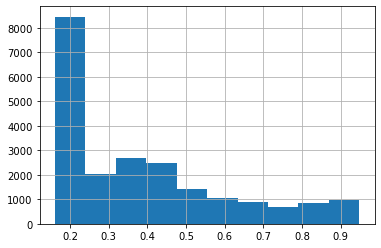

In [25]:
val['final_score'].hist()

# 6.0 Model Output

In [26]:
with open('../../data_lake/output/trained_model_v1.pkl','wb') as file:
    pickle.dump(m.base_estimator, file)

In [27]:
with open('../../data_lake/output/log_scaler_bi.pkl','wb') as file:
    pickle.dump(scaler, file)